In [1]:
import numpy as np
import pandas as pd
from os import listdir
from copy import deepcopy

import matplotlib.pyplot as plt
rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

def Load_BLAST_Hits(filepath, qcov_filter = 95):
    df = pd.read_csv(filepath, sep = "\t", names = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 
                                                    'gapopen', 'qstart', 'qend', 'sstart', 'send',
                                                    'evalue', 'bitscore'])
    df['qcov'] = df['length']/150*100.0
    df = df[df['qcov'] >= qcov_filter]
    df['Divergence'] = df['mismatch']/150*100.0
    df = df.drop_duplicates('qseqid')
    df = df[['qseqid','mismatch']]
    return df


In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/A_Alleles/'
files = listdir(filedir)

Gene_Blast = {}
for g in files:
    if g.startswith('YSG'):
        df_blast_A_Alleles = pd.DataFrame()
        splits = g.split('_')
        gene = splits[0]+'_'+splits[1]
        #if gene != 'YSG_1367':
        #    continue
        Allele = 'A'
        samples = listdir(filedir+g+'/')
        for s in samples:
            if s.startswith('MS'):
                blast_hits = listdir(filedir+g+'/'+s+'/')
                for b in blast_hits:
                    if b.startswith('MS'):
                        df = Load_BLAST_Hits(filedir+g+'/'+s+'/'+b)
                        df['Sample'] = s
                        df['Allele'] = Allele
                        df['Gene'] = gene
                        df_blast_A_Alleles = df_blast_A_Alleles.append(df)
        Gene_Blast[gene] = df_blast_A_Alleles
        print(gene)

YSG_0096b
YSG_1447b
YSG_0966
YSG_0699
YSG_1319
YSG_1748
YSG_0898
YSG_1924
YSG_0340
YSG_0764
YSG_0548
YSG_1576
YSG_1709
YSG_1299
YSG_0688
YSG_1142
YSG_1779
YSG_0985
YSG_0168b
YSG_1325
YSG_1272
YSG_0072a
YSG_0314
YSG_0694b
YSG_1487
YSG_1514
YSG_0136a
YSG_0108a
YSG_1367
YSG_0675
YSG_1694


In [3]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/B_Alleles/'
files = listdir(filedir)

for g in files:
    if g.startswith('YSG'):
        df_blast_B_Alleles = pd.DataFrame()
        splits = g.split('_')
        gene = splits[0]+'_'+splits[1]
        Allele = 'B'
        samples = listdir(filedir+g+'/')
        for s in samples:
            if s.startswith('MS'):
                blast_hits = listdir(filedir+g+'/'+s+'/')
                for b in blast_hits:
                    if b.startswith('MS'):
                        df = Load_BLAST_Hits(filedir+g+'/'+s+'/'+b)
                        df['Sample'] = s
                        df['Allele'] = Allele
                        df['Gene'] = gene
                        df_blast_B_Alleles = df_blast_B_Alleles.append(df)
        Gene_Blast[gene] = Gene_Blast[gene].append(df_blast_B_Alleles, ignore_index = True)
        print(gene)

YSG_1576
YSG_0764
YSG_1447b
YSG_1779
YSG_1748
YSG_0688
YSG_1319
YSG_0699
YSG_0985
YSG_1272
YSG_0898
YSG_0096b
YSG_1694
YSG_1299
YSG_1514
YSG_0168b
YSG_1325
YSG_0675
YSG_0072a
YSG_1367
YSG_1709
YSG_1142
YSG_0108a
YSG_1924
YSG_0340
YSG_0694b
YSG_0136a
YSG_1487
YSG_0966
YSG_0314
YSG_0548


In [4]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/C_Alleles/'
files = listdir(filedir)

for g in files:
    if g.startswith('YSG'):
        df_blast_C_Alleles = pd.DataFrame()
        splits = g.split('_')
        gene = splits[0]+'_'+splits[1]
        Allele = 'C'
        samples = listdir(filedir+g+'/')
        for s in samples:
            if s.startswith('MS'):
                blast_hits = listdir(filedir+g+'/'+s+'/')
                for b in blast_hits:
                    if b.startswith('MS'):
                        df = Load_BLAST_Hits(filedir+g+'/'+s+'/'+b)
                        df['Sample'] = s
                        df['Allele'] = Allele
                        df['Gene'] = gene
                        df_blast_C_Alleles = df_blast_C_Alleles.append(df)
        Gene_Blast[gene] = Gene_Blast[gene].append(df_blast_C_Alleles, ignore_index = True)
        print(gene)

YSG_1367
YSG_0675
YSG_0985
YSG_0136a
YSG_0314
YSG_0688
YSG_1924
YSG_1694
YSG_0548
YSG_1748
YSG_1142
YSG_1272
YSG_1576
YSG_1514
YSG_0898
YSG_0699
YSG_1447b
YSG_1709
YSG_0340
YSG_0694b
YSG_0108a
YSG_1299
YSG_1319
YSG_0072a
YSG_0966
YSG_1325
YSG_0168b
YSG_1779
YSG_0096b
YSG_0764
YSG_1487


In [17]:
Gene_Blast_grouped = {}
for g in Gene_Blast:
    T = deepcopy(Gene_Blast[g])
    for s in T['Sample'].unique():
        print(g, s)
        Temp = T[T['Sample'] == s]
        idx = Temp.groupby(['qseqid','Allele'])['mismatch'].transform(min) == Temp['mismatch']
        Temp = Temp.loc[idx]
        Temp = Temp.drop_duplicates('qseqid')
        Temp = Temp.groupby(['mismatch']).count()[['qseqid']]
        Temp['Counts'] = np.cumsum(Temp['qseqid'])
        Temp['Divergence'] = Temp.index/150*100
        try:
            Gene_Blast_grouped[g][s] = Temp
        except KeyError:
            Gene_Blast_grouped[g] = {s: Temp}

YSG_0096b MS65
YSG_0096b MS55
YSG_0096b MS50
YSG_0096b MS60
YSG_1447b MS65
YSG_1447b MS55
YSG_1447b MS50
YSG_1447b MS60
YSG_0966 MS65
YSG_0966 MS55
YSG_0966 MS50
YSG_0966 MS60
YSG_0699 MS65
YSG_0699 MS55
YSG_0699 MS50
YSG_0699 MS60
YSG_1319 MS65
YSG_1319 MS55
YSG_1319 MS50
YSG_1319 MS60
YSG_1748 MS65
YSG_1748 MS55
YSG_1748 MS50
YSG_1748 MS60
YSG_0898 MS65
YSG_0898 MS55
YSG_0898 MS50
YSG_0898 MS60
YSG_1924 MS65
YSG_1924 MS55
YSG_1924 MS50
YSG_1924 MS60
YSG_0340 MS65
YSG_0340 MS55
YSG_0340 MS50
YSG_0340 MS60
YSG_0764 MS65
YSG_0764 MS55
YSG_0764 MS50
YSG_0764 MS60
YSG_0548 MS65
YSG_0548 MS55
YSG_0548 MS50
YSG_0548 MS60
YSG_1576 MS65
YSG_1576 MS55
YSG_1576 MS50
YSG_1576 MS60
YSG_1709 MS65
YSG_1709 MS55
YSG_1709 MS50
YSG_1709 MS60
YSG_1299 MS65
YSG_1299 MS55
YSG_1299 MS50
YSG_1299 MS60
YSG_0688 MS65
YSG_0688 MS55
YSG_0688 MS50
YSG_0688 MS60
YSG_1142 MS65
YSG_1142 MS55
YSG_1142 MS50
YSG_1142 MS60
YSG_1779 MS65
YSG_1779 MS55
YSG_1779 MS50
YSG_1779 MS60
YSG_0985 MS65
YSG_0985 MS55
YSG_0985 MS5

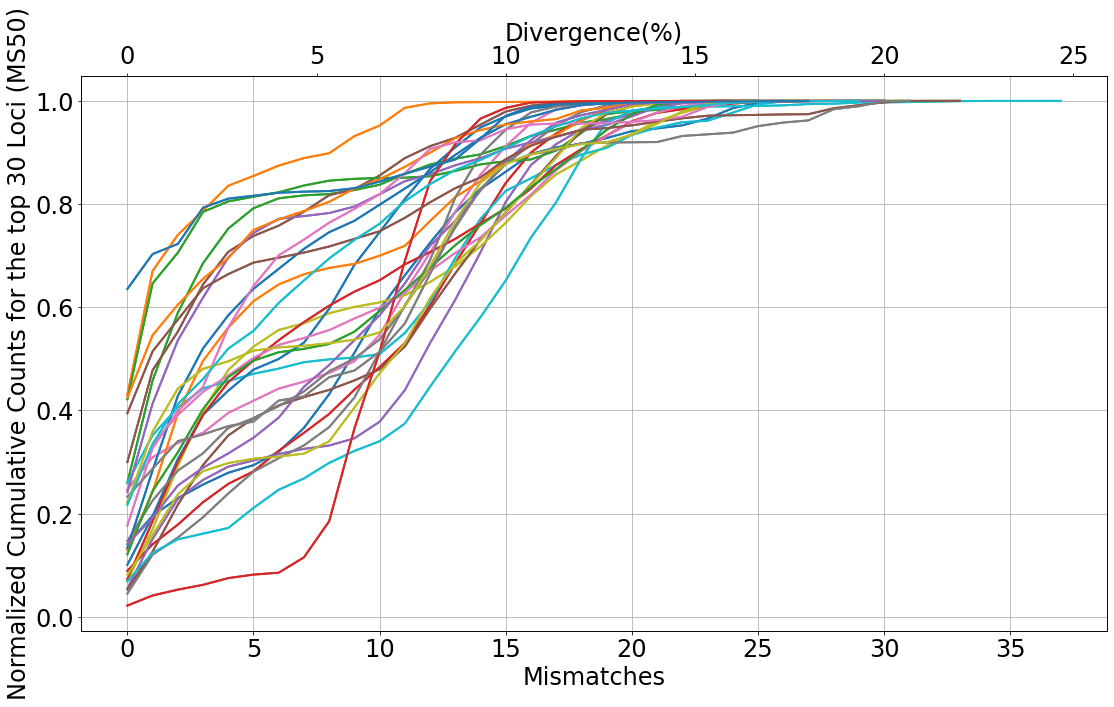

In [31]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()
df_op = pd.DataFrame()

for g in Gene_Blast_grouped:
    #df_op = pd.concat([df_op, Gene_Blast_grouped[g]])
    ax.plot(Gene_Blast_grouped[g]['MS50'].index.tolist(), 
            Gene_Blast_grouped[g]['MS50'].Counts/Gene_Blast_grouped[g]['MS50'].iloc[-1].Counts ,
            linewidth = 2)
    ax2.plot(Gene_Blast_grouped[g]['MS50'].Divergence.tolist(), 
             Gene_Blast_grouped[g]['MS50'].Counts/Gene_Blast_grouped[g]['MS50'].iloc[-1].Counts ,
             linewidth = 2)
ax.grid()
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax.set_xlabel('Mismatches')
ax2.set_xlabel('Divergence(%)')
ax.set_ylabel('Normalized Cumulative Counts for the top 30 Loci (MS50)')
#ax.set_yscale('log')
#ax.set_ylim([5000, 200000])
fig.tight_layout()


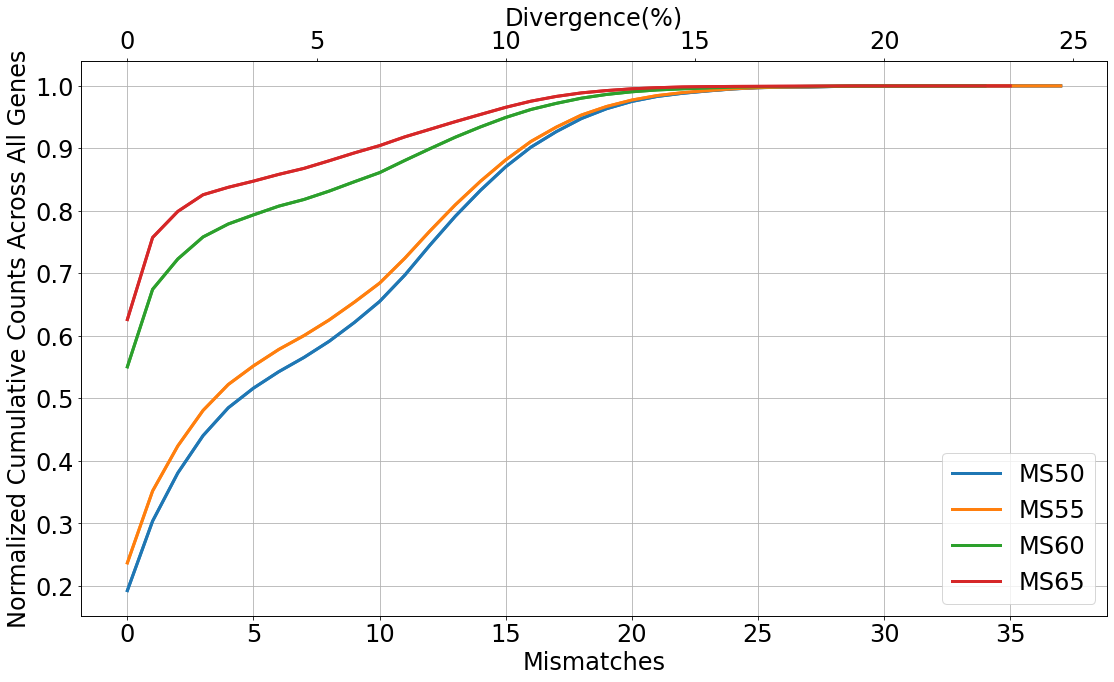

In [21]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()

for s in ['MS50','MS55','MS60', 'MS65']:
    df_op = pd.DataFrame()
    for g in Gene_Blast_grouped:
        df_op = pd.concat([df_op, Gene_Blast_grouped[g][s]])
    df_op = df_op.reset_index().groupby(['mismatch', 'Divergence']).sum().reset_index().set_index('mismatch')
    df_op['Counts'] = df_op['qseqid'].cumsum()
    ax.plot(df_op.index.tolist(), df_op.Counts/df_op['Counts'].iloc[-1], linewidth = 3, label = s)
    ax2.plot(df_op.Divergence.tolist(), df_op.Counts/df_op['Counts'].iloc[-1], linewidth = 3)
ax.grid()
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax.set_xlabel('Mismatches')
ax2.set_xlabel('Divergence(%)')
ax.set_ylabel('Normalized Cumulative Counts Across All Genes')
ax.legend()
fig.tight_layout()


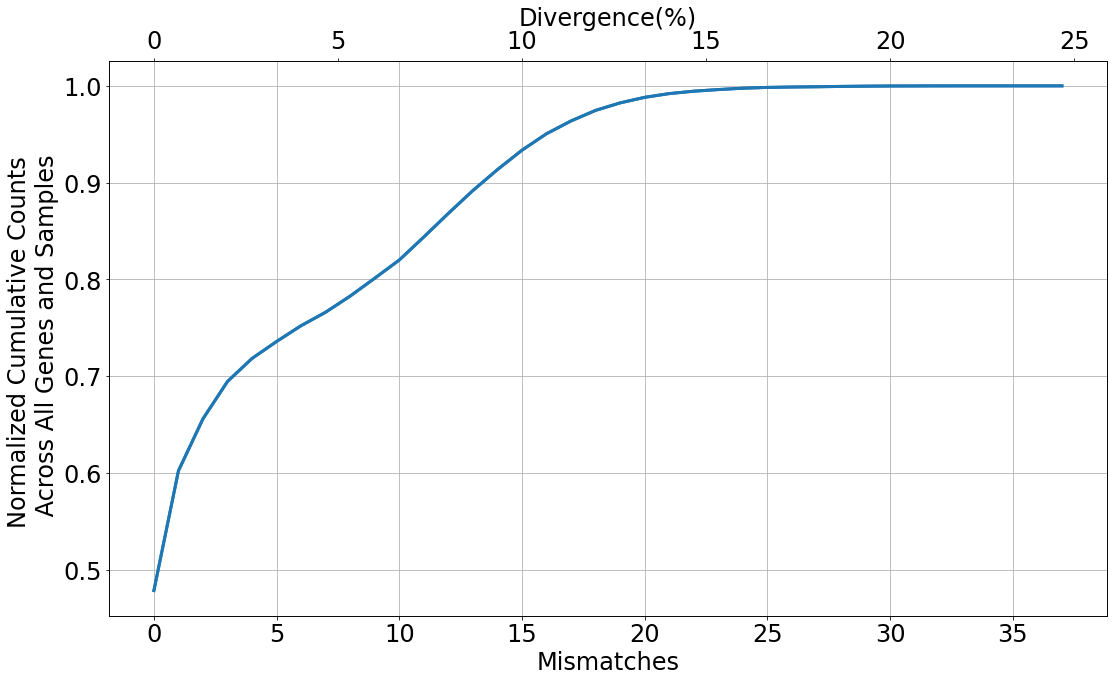

In [24]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()
df_op = pd.DataFrame()

for s in ['MS50','MS55','MS60', 'MS65']:
    for g in Gene_Blast_grouped:
        df_op = pd.concat([df_op, Gene_Blast_grouped[g][s]])
df_op = df_op.reset_index().groupby(['mismatch', 'Divergence']).sum().reset_index().set_index('mismatch')
df_op['Counts'] = df_op['qseqid'].cumsum()
ax.plot(df_op.index.tolist(), df_op.Counts/df_op['Counts'].iloc[-1], linewidth = 3)
ax2.plot(df_op.Divergence.tolist(), df_op.Counts/df_op['Counts'].iloc[-1], linewidth = 3)
ax.grid()
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax.set_xlabel('Mismatches')
ax2.set_xlabel('Divergence(%)')
ax.set_ylabel('Normalized Cumulative Counts \n Across All Genes and Samples')
fig.tight_layout()